video  \
0  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
1  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
2  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
3  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
4  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
5  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
6  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
7  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
8  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   
9  /tmp/video_chunks_ffmpeg_sub_p_zkqqqx/chunk_00...   

                                               audio  \
0  /home/razvantalexandru/.pixeltable/media/7a269...   
1  /home/razvantalexandru/.pixeltable/media/7a269...   
2  /home/razvantalexandru/.pixeltable/media/7a269...   
3  /home/razvantalexandru/.pixeltable/media/7a269...   
4  /home/razvantalexandru/.pixeltable/media/7a269...   
5  /home/razvantalexandru/.pixeltable/media/7a269...   
6  /home/razvantalexandru/.pixeltable/media/7a269...   
7  /home/razvantalexandru/.pixeltable/media/7a269...   
8  /home/razvantalexandru/.pixeltable/media/7a269...   
9  /home/razvantalexandru/.pixeltable/media/7a269...   

                                       transcription  \
0  {'text': ' the red. Portugal in the all red. S...   
1  {'text': ' before we can take a look at', 'lan...   
2  {'text': ' from the 2016 European champions. T...   
3  {'text': ' I wonder what he's feeling now. The...   
4  {'text': ' at eight days ago. Portugal regular...   
5  {'text': ' to Italian assistance. Ra'Yuzin Sat...   
6  {'text': ' the first time in the year. The coa...   
7  {'text': ' What a great day. Fernando Santos. ...   
8  {'text': ' to just the', 'language': 'en', 'se...   
9  {'text': ' as this match gets underway. Spain ...   

                                            metadata  \
0  {'size': 478700, 'streams': [{'type': 'audio',...   
1  {'size': 478700, 'streams': [{'type': 'audio',...   
2  {'size': 478700, 'streams': [{'type': 'audio',...   
3  {'size': 479084, 'streams': [{'type': 'audio',...   
4  {'size': 478700, 'streams': [{'type': 'audio',...   
5  {'size': 479084, 'streams': [{'type': 'audio',...   
6  {'size': 478700, 'streams': [{'type': 'audio',...   
7  {'size': 478700, 'streams': [{'type': 'audio',...   
8  {'size': 478700, 'streams': [{'type': 'audio',...   
9  {'size': 479084, 'streams': [{'type': 'audio',...   

                                       video_caption  \
0  A soccer match is underway, with players from ...   
1  A soccer match is underway, with the main acti...   
2  A soccer match is underway, with players from ...   
3  A soccer match is underway, with the main acti...   
4  A group of soccer players are huddling togethe...   
5  The video shows a group of individuals engaged...   
6  The video shows a soccer match between spain a...   
7  The video shows a soccer match where players a...   
8  A soccer match is underway, with players from ...   
9  A soccer match is underway between portugal an...   

                                                text  \
0  A soccer match is underway, with players from ...   
1  A soccer match is underway, with the main acti...   
2  A soccer match is underway, with players from ...   
3  A soccer match is underway, with the main acti...   
4  A group of soccer players are huddling togethe...   
5  The video shows a group of individuals engaged...   
6  The video shows a soccer match between spain a...   
7  The video shows a soccer match where players a...   
8  A soccer match is underway, with players from ...   
9  A soccer match is underway between portugal an...   

                                            fulltext  
0  A soccer match is underway, with players from ...  
1  A soccer match is underway, with the main acti...  
2  A soccer match is underway, with players from ...  
3  A soccer match is underway, with the main acti...  
4  A group of soccer players are huddling togethe...  
5  The video sh
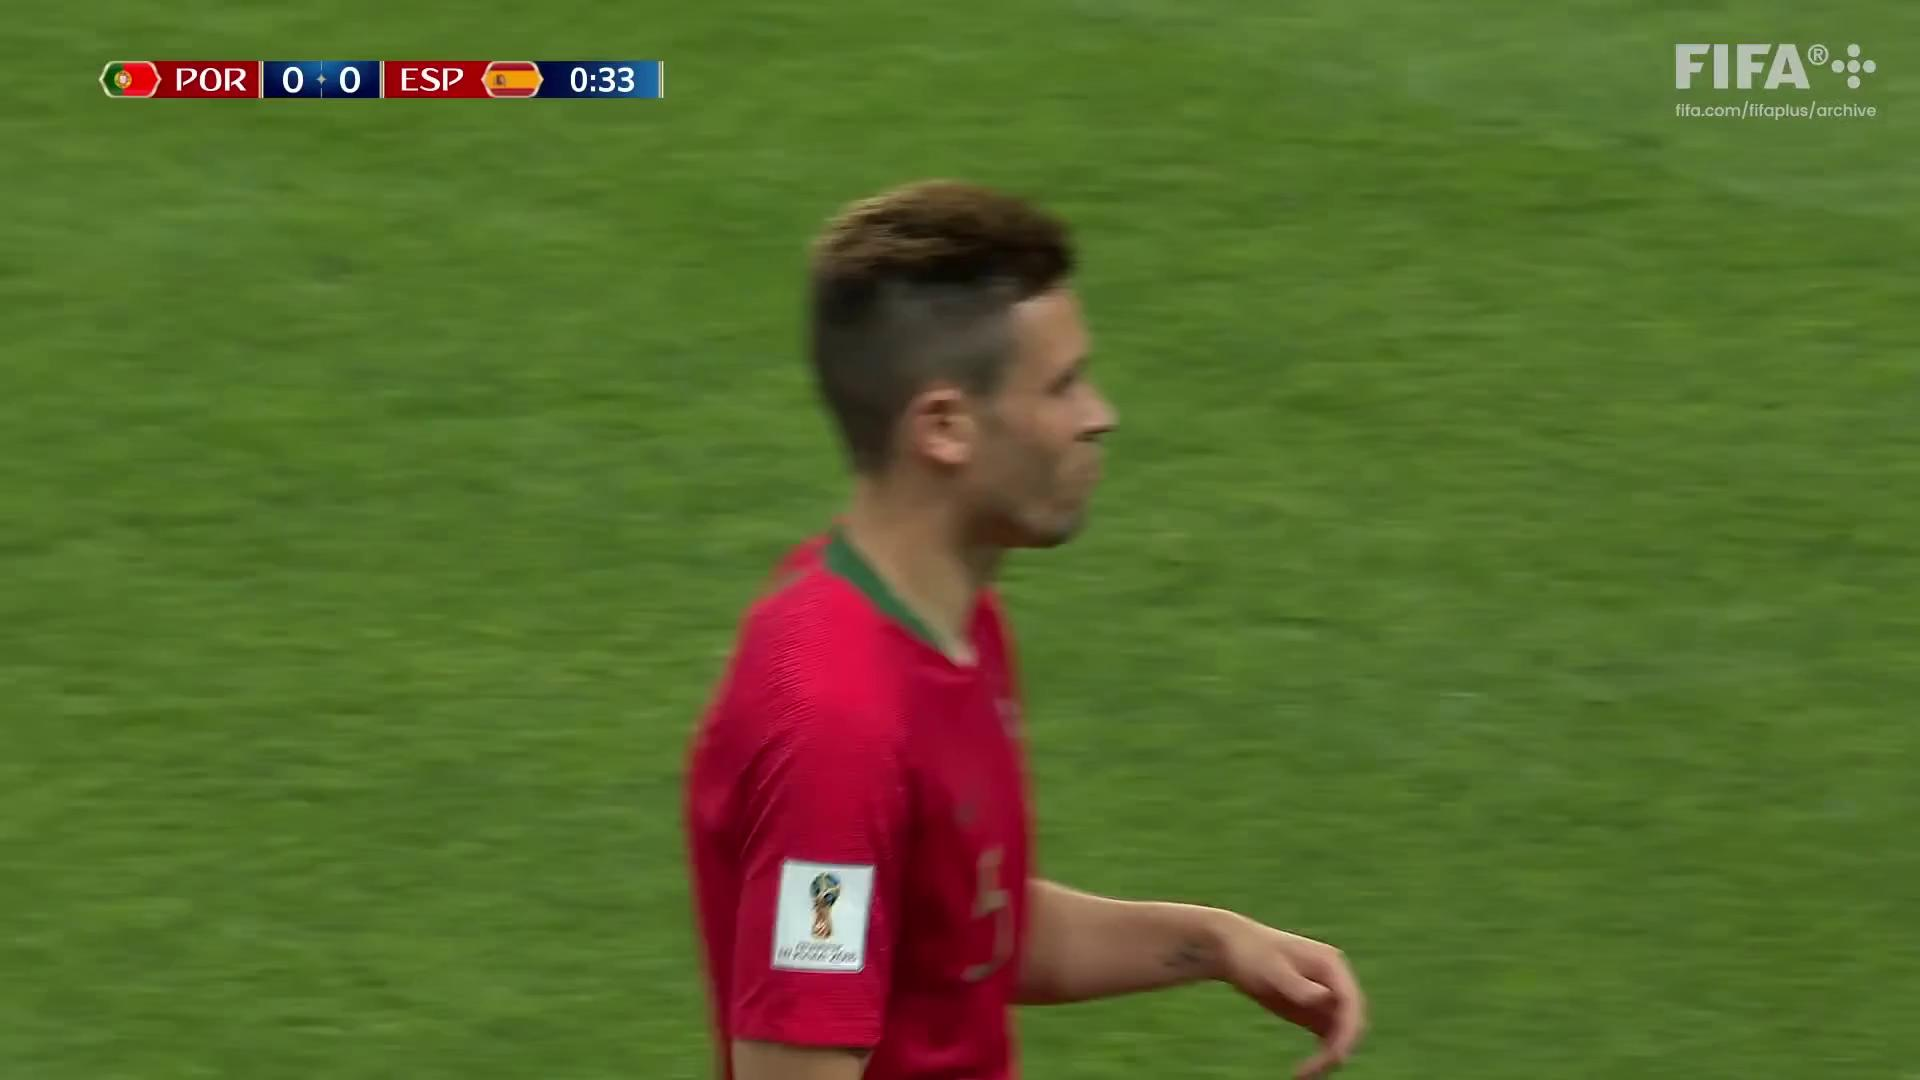
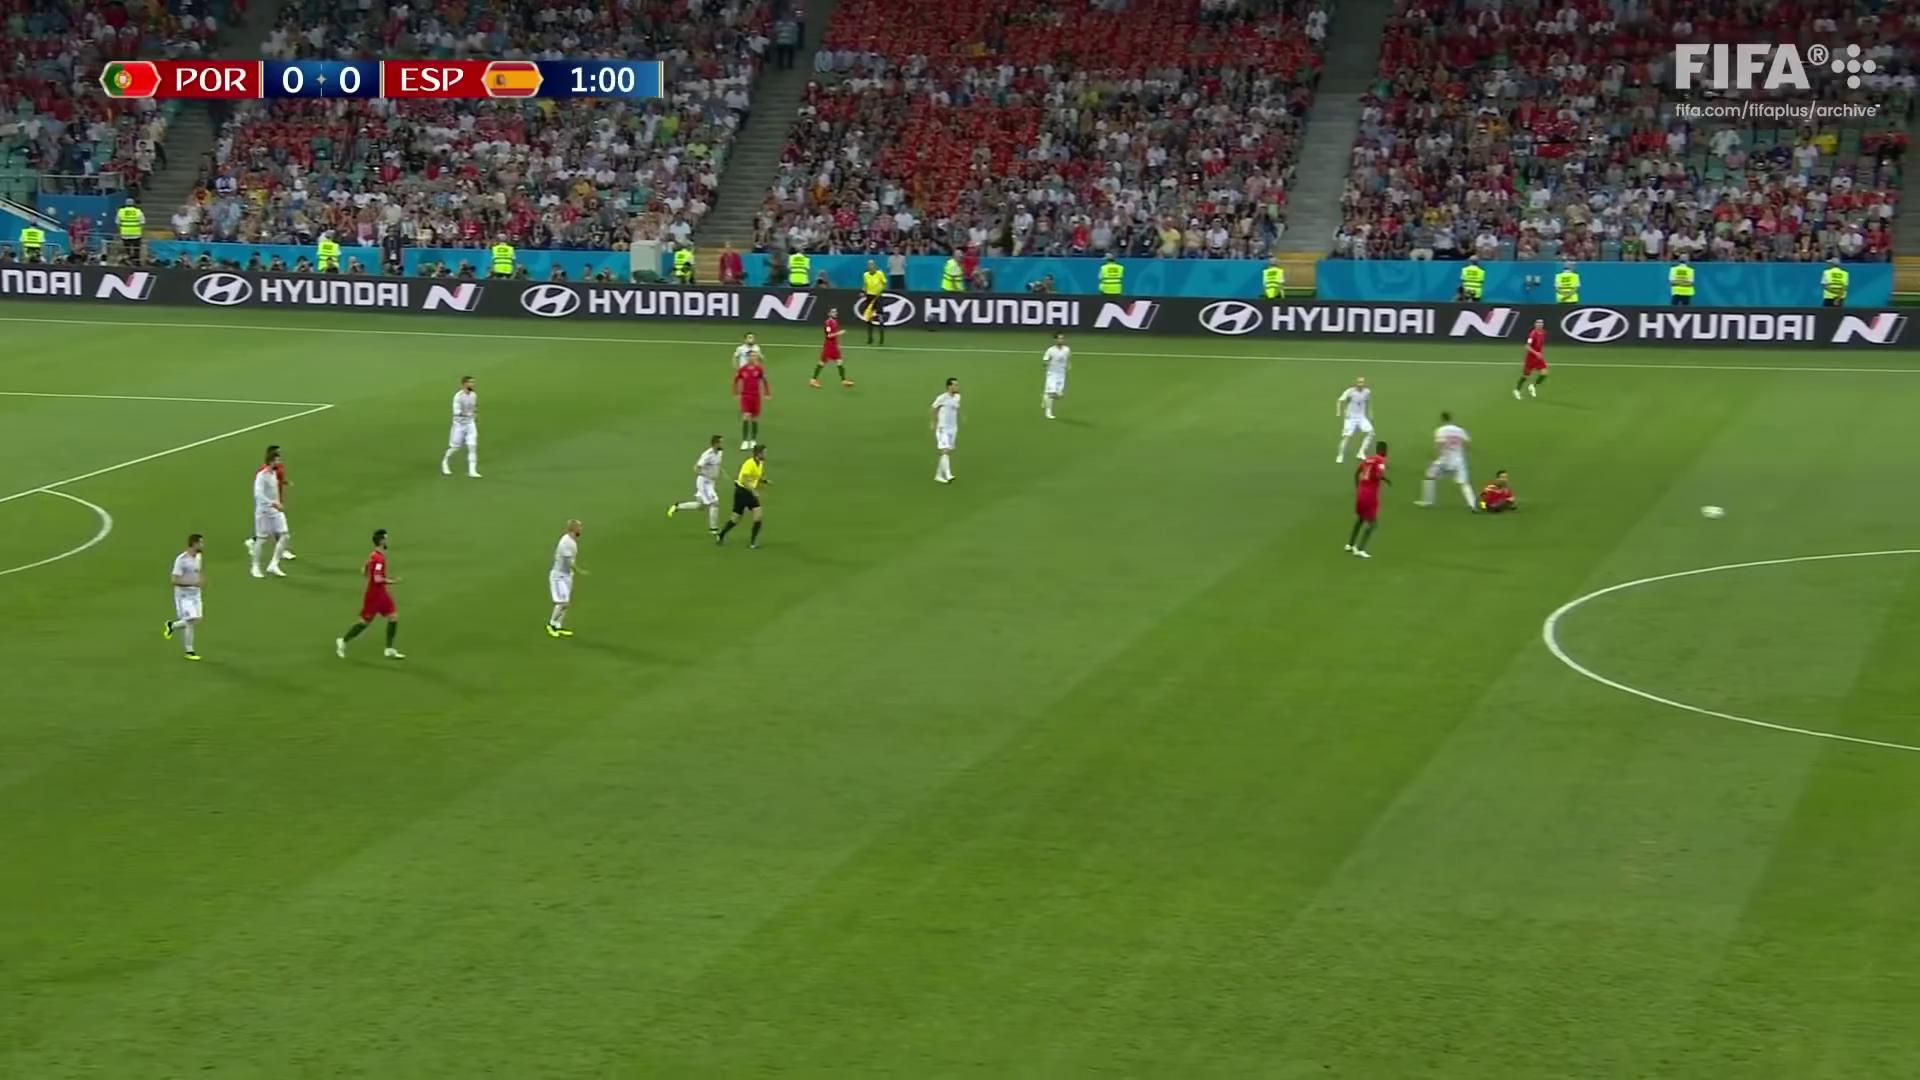
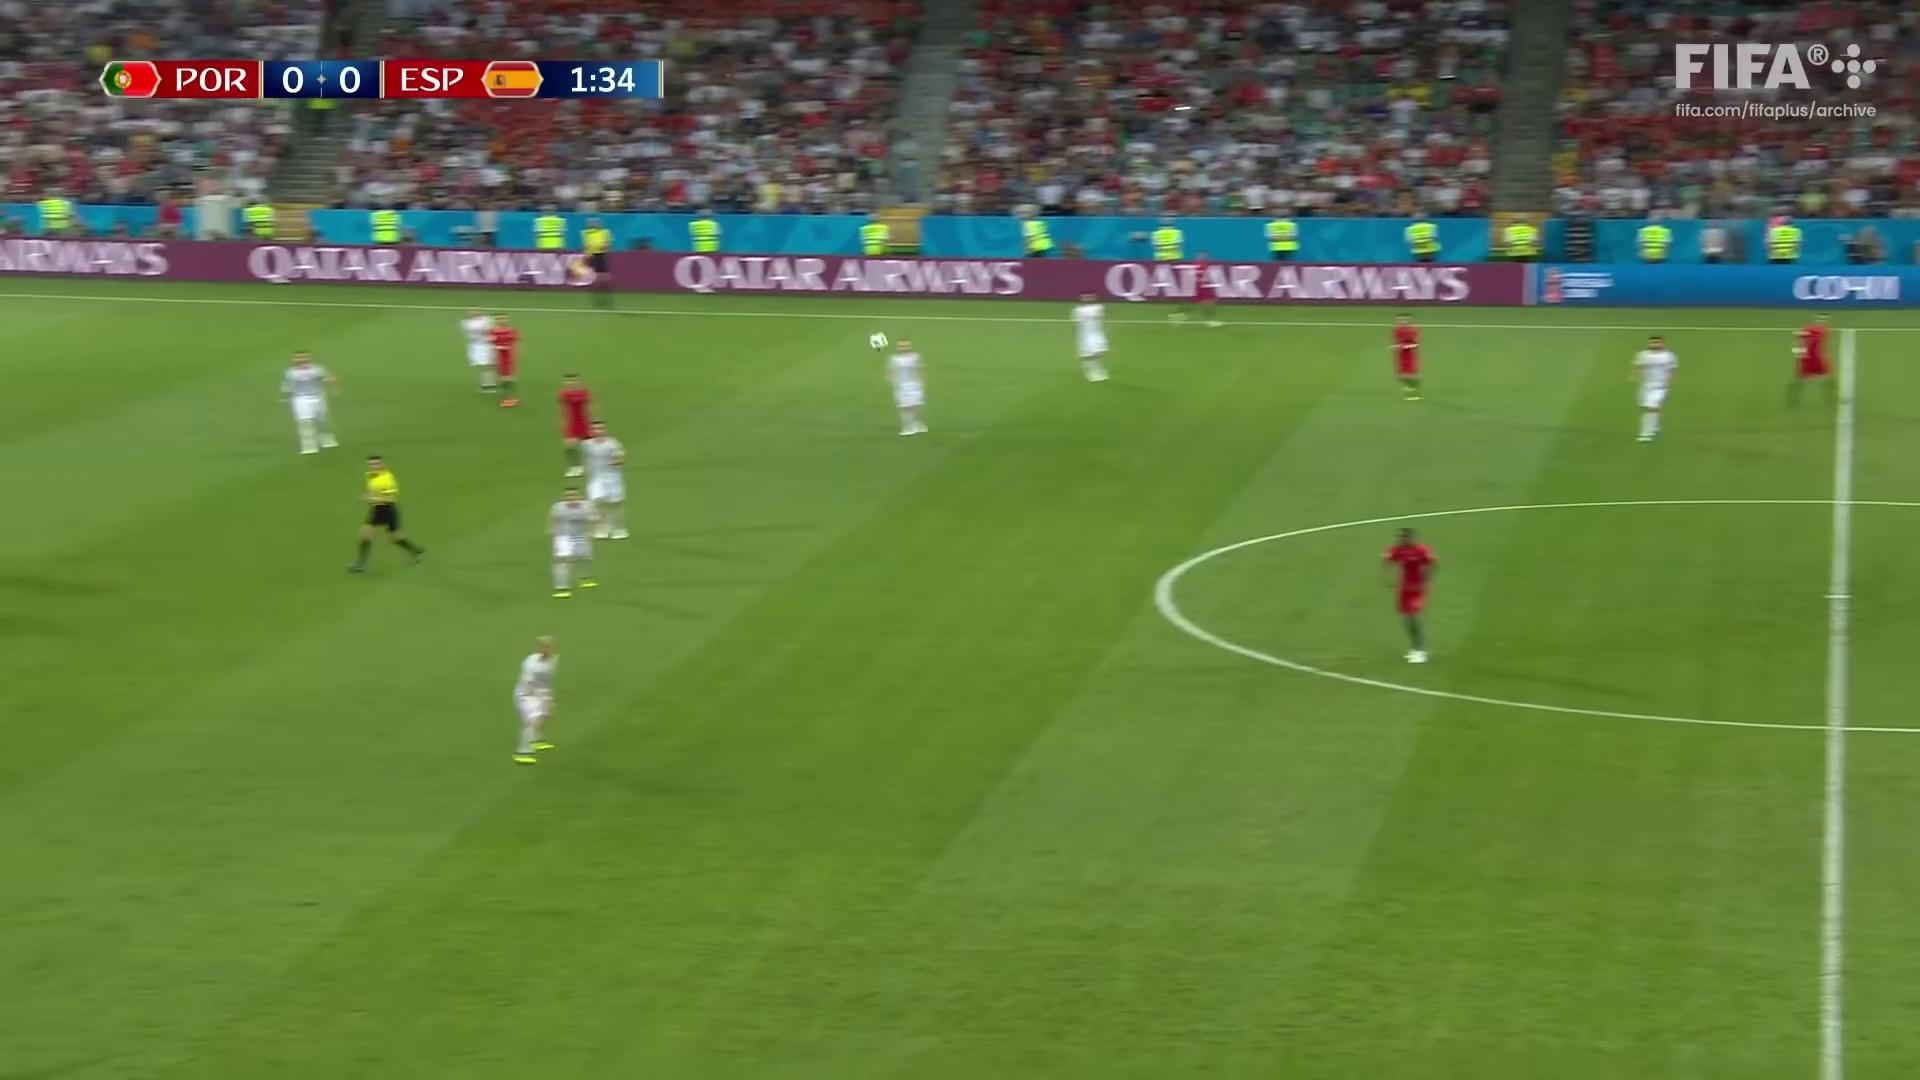
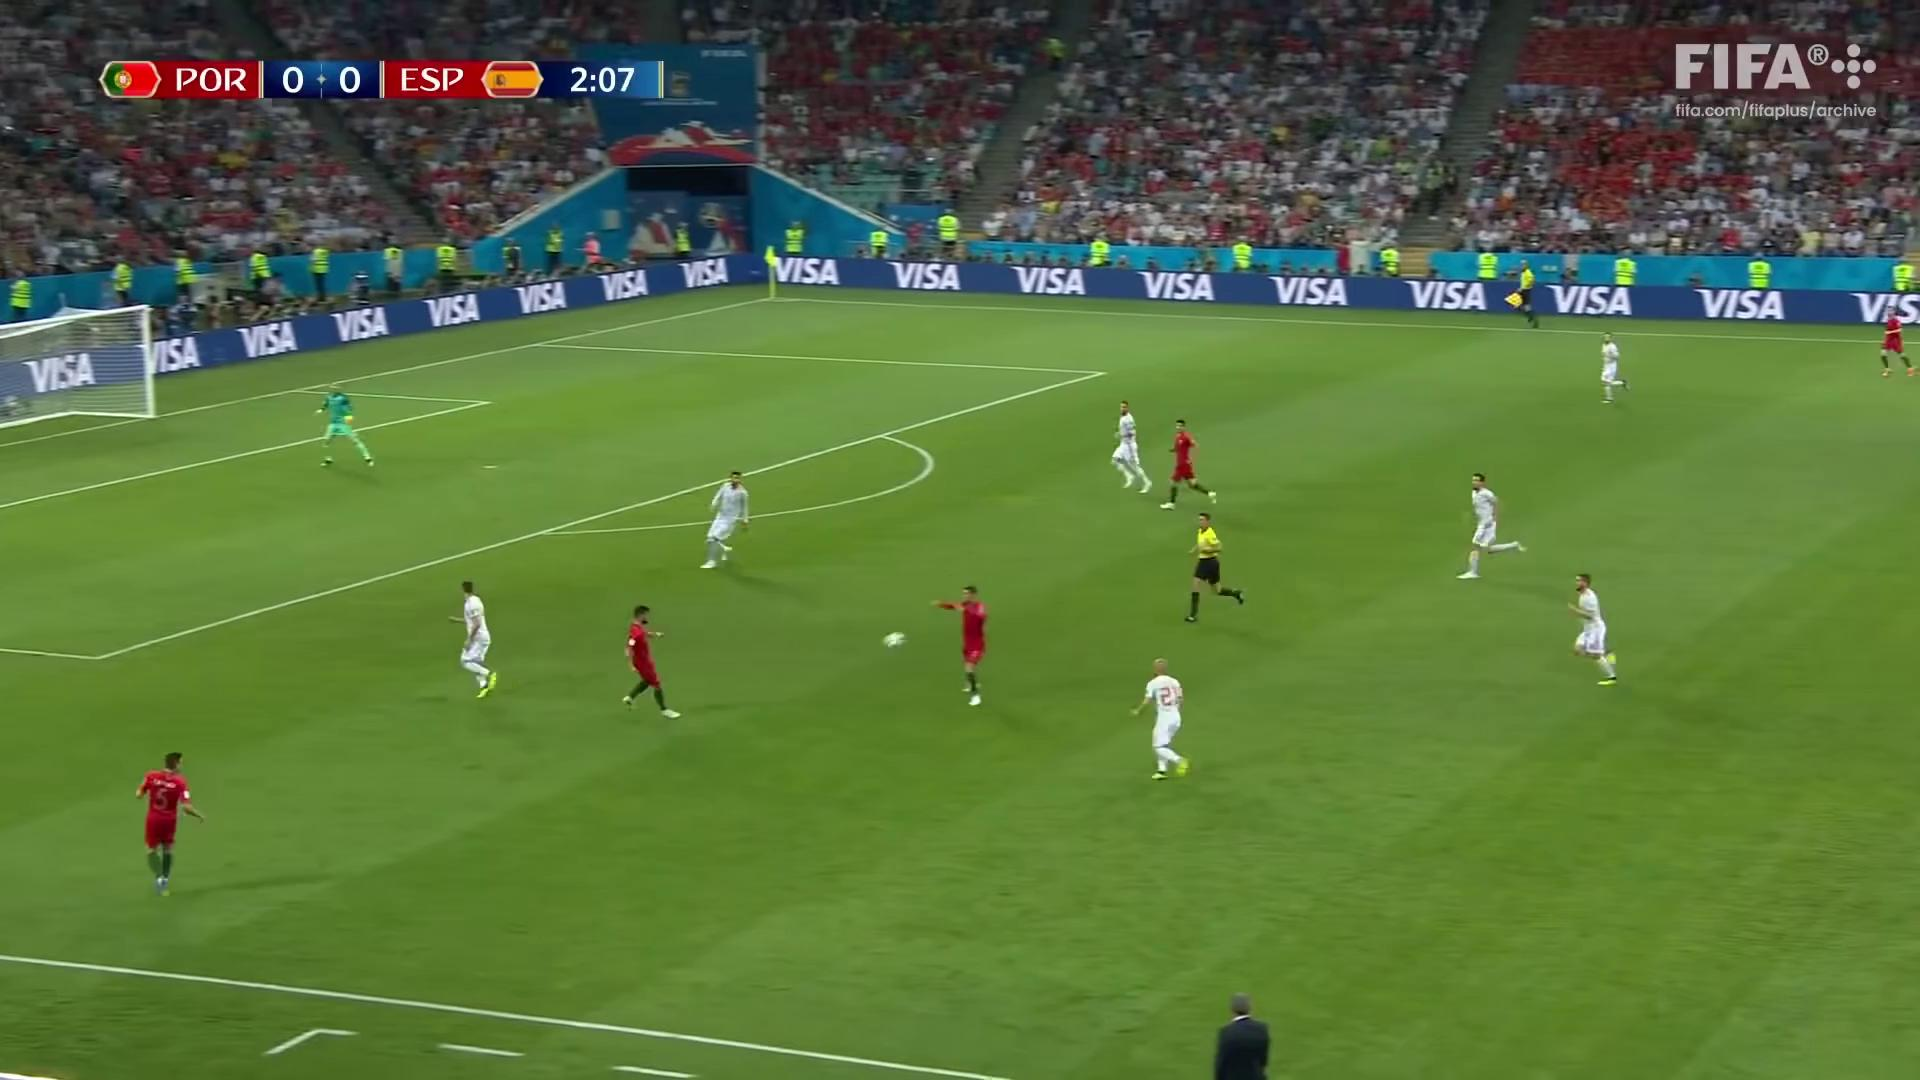
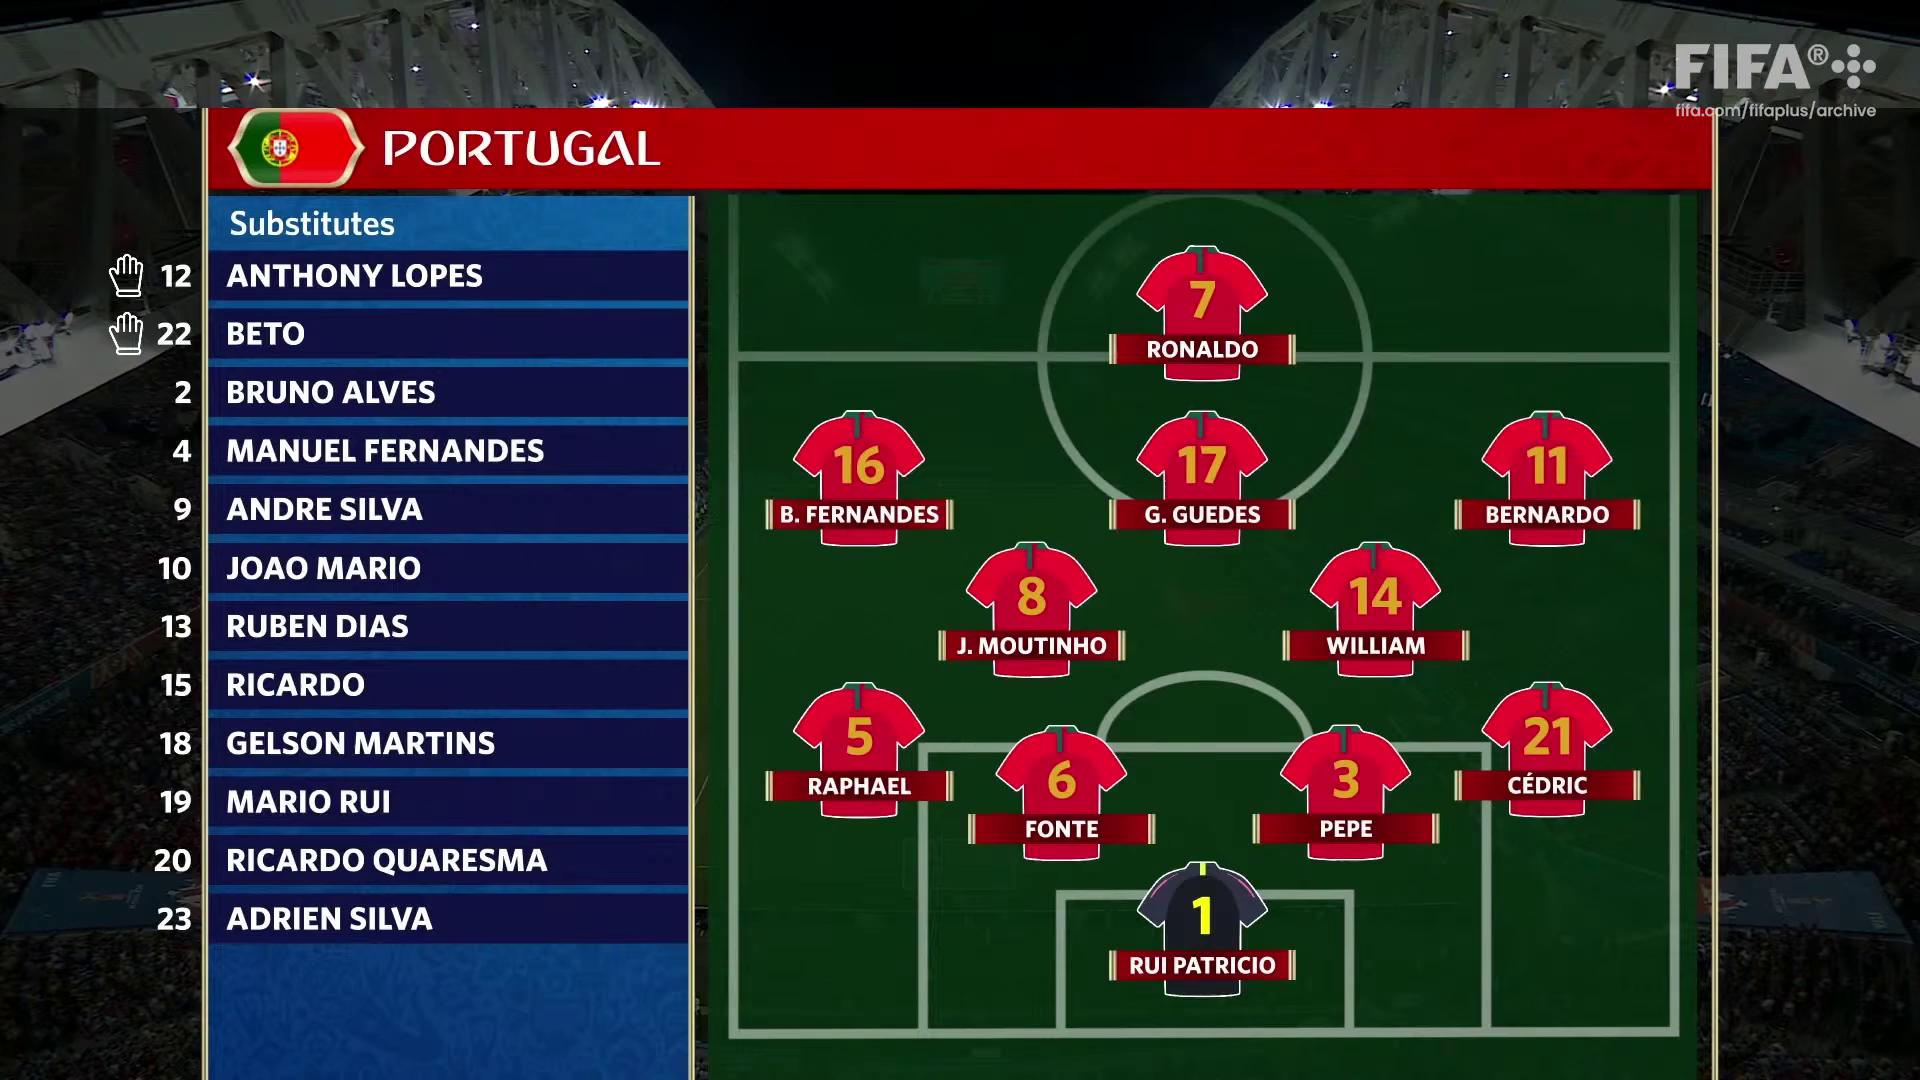
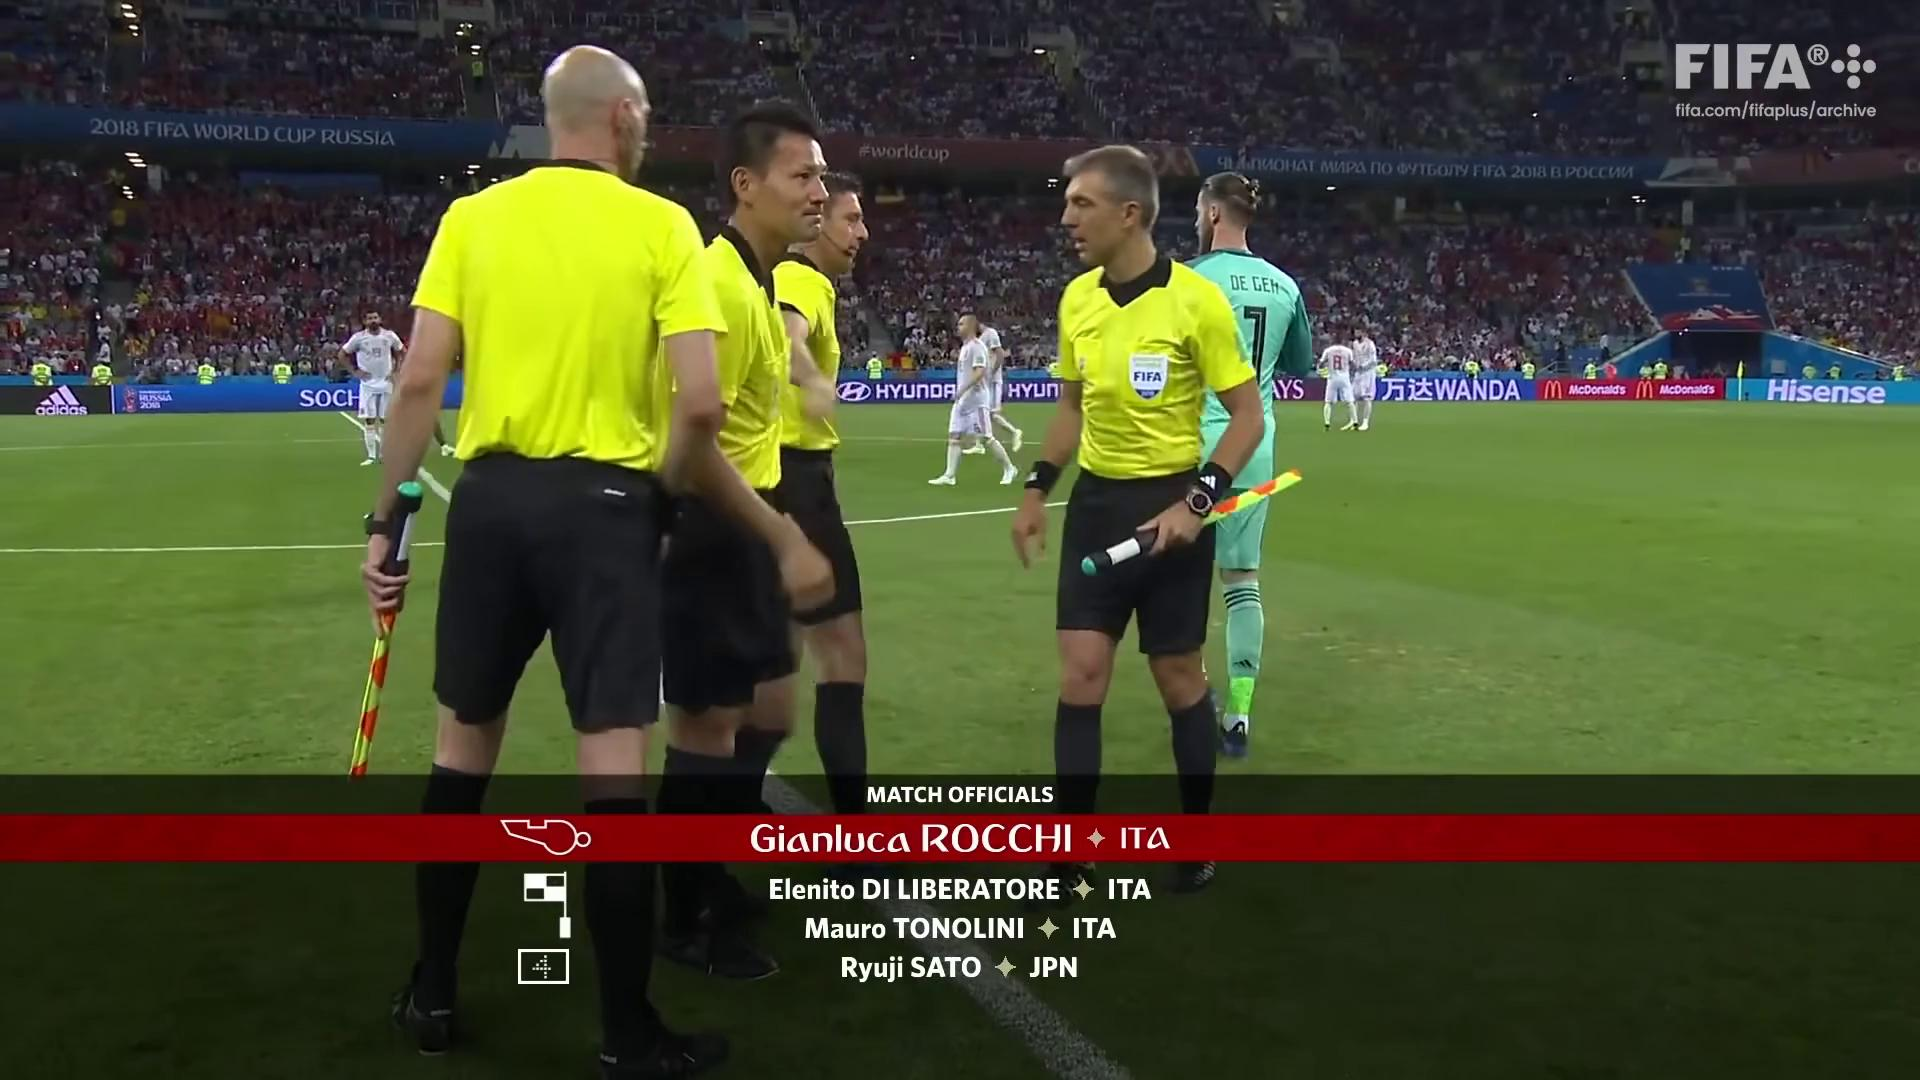
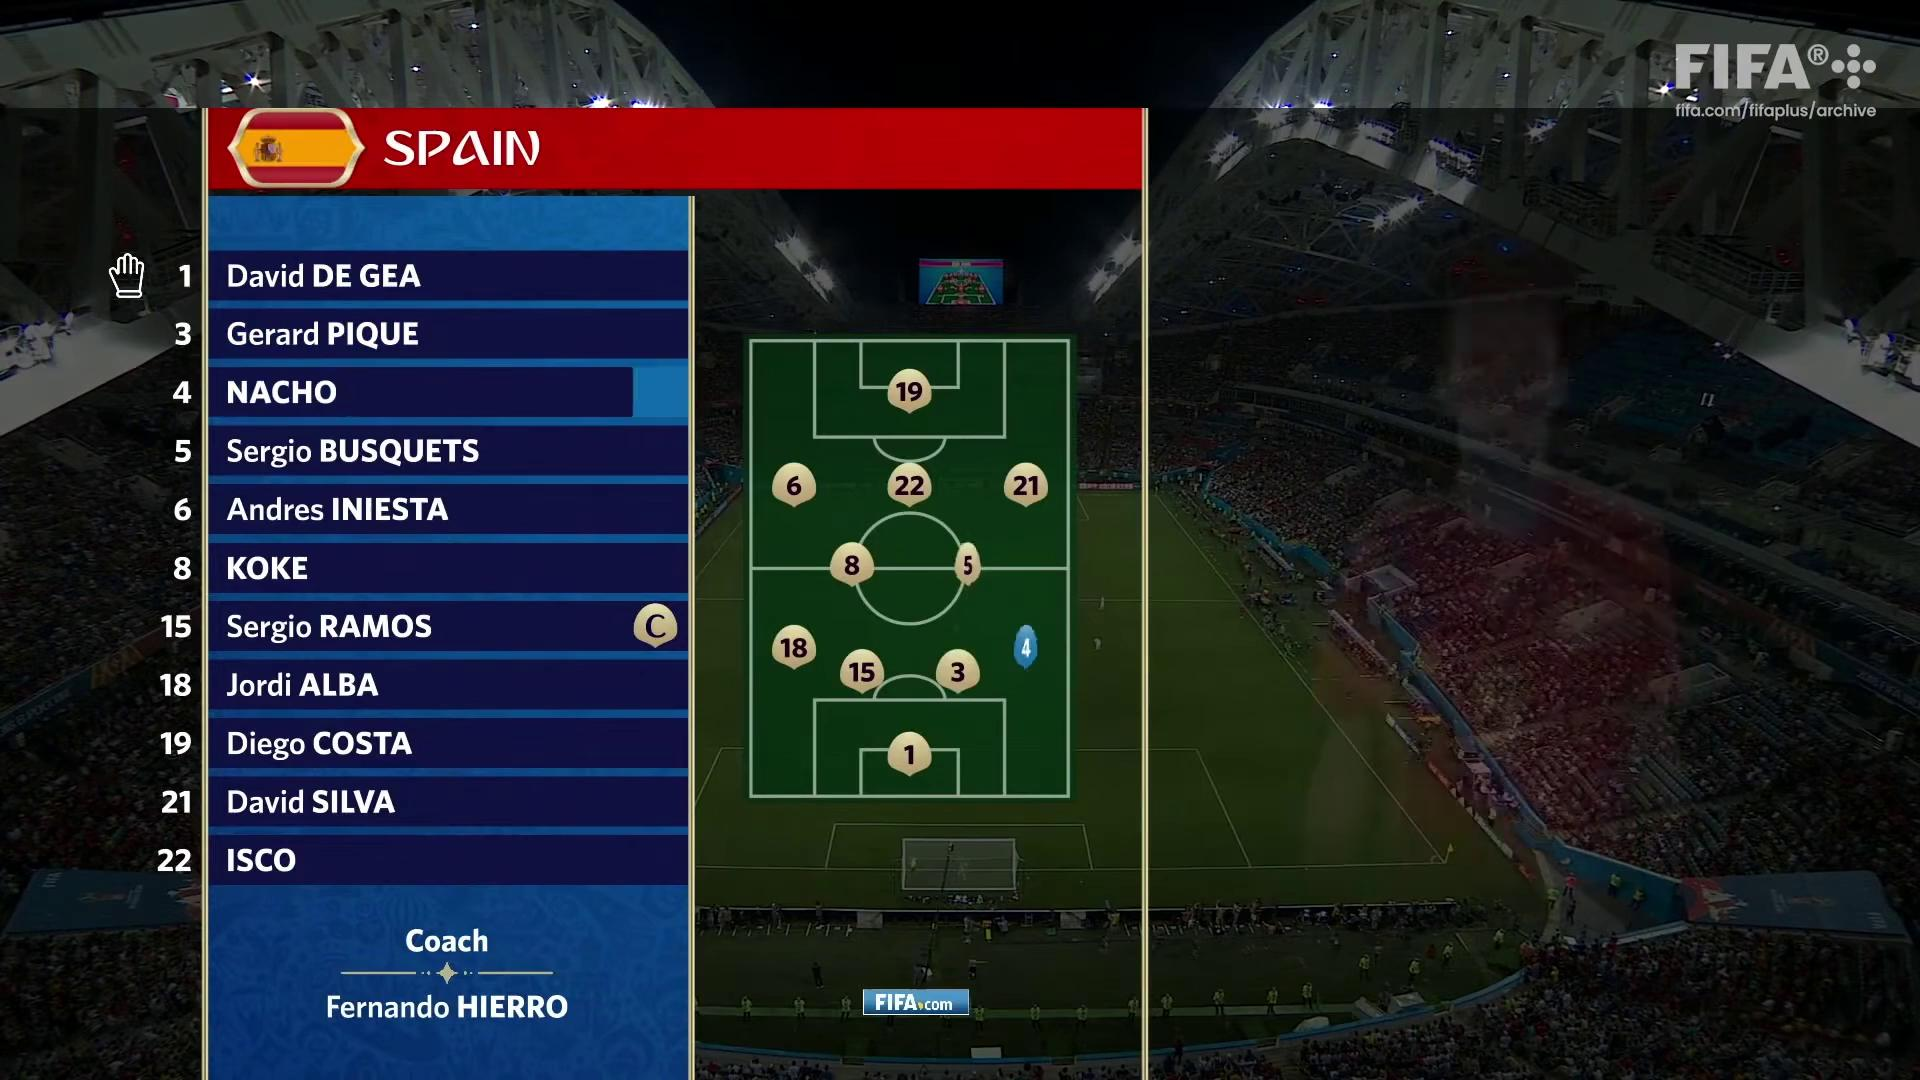
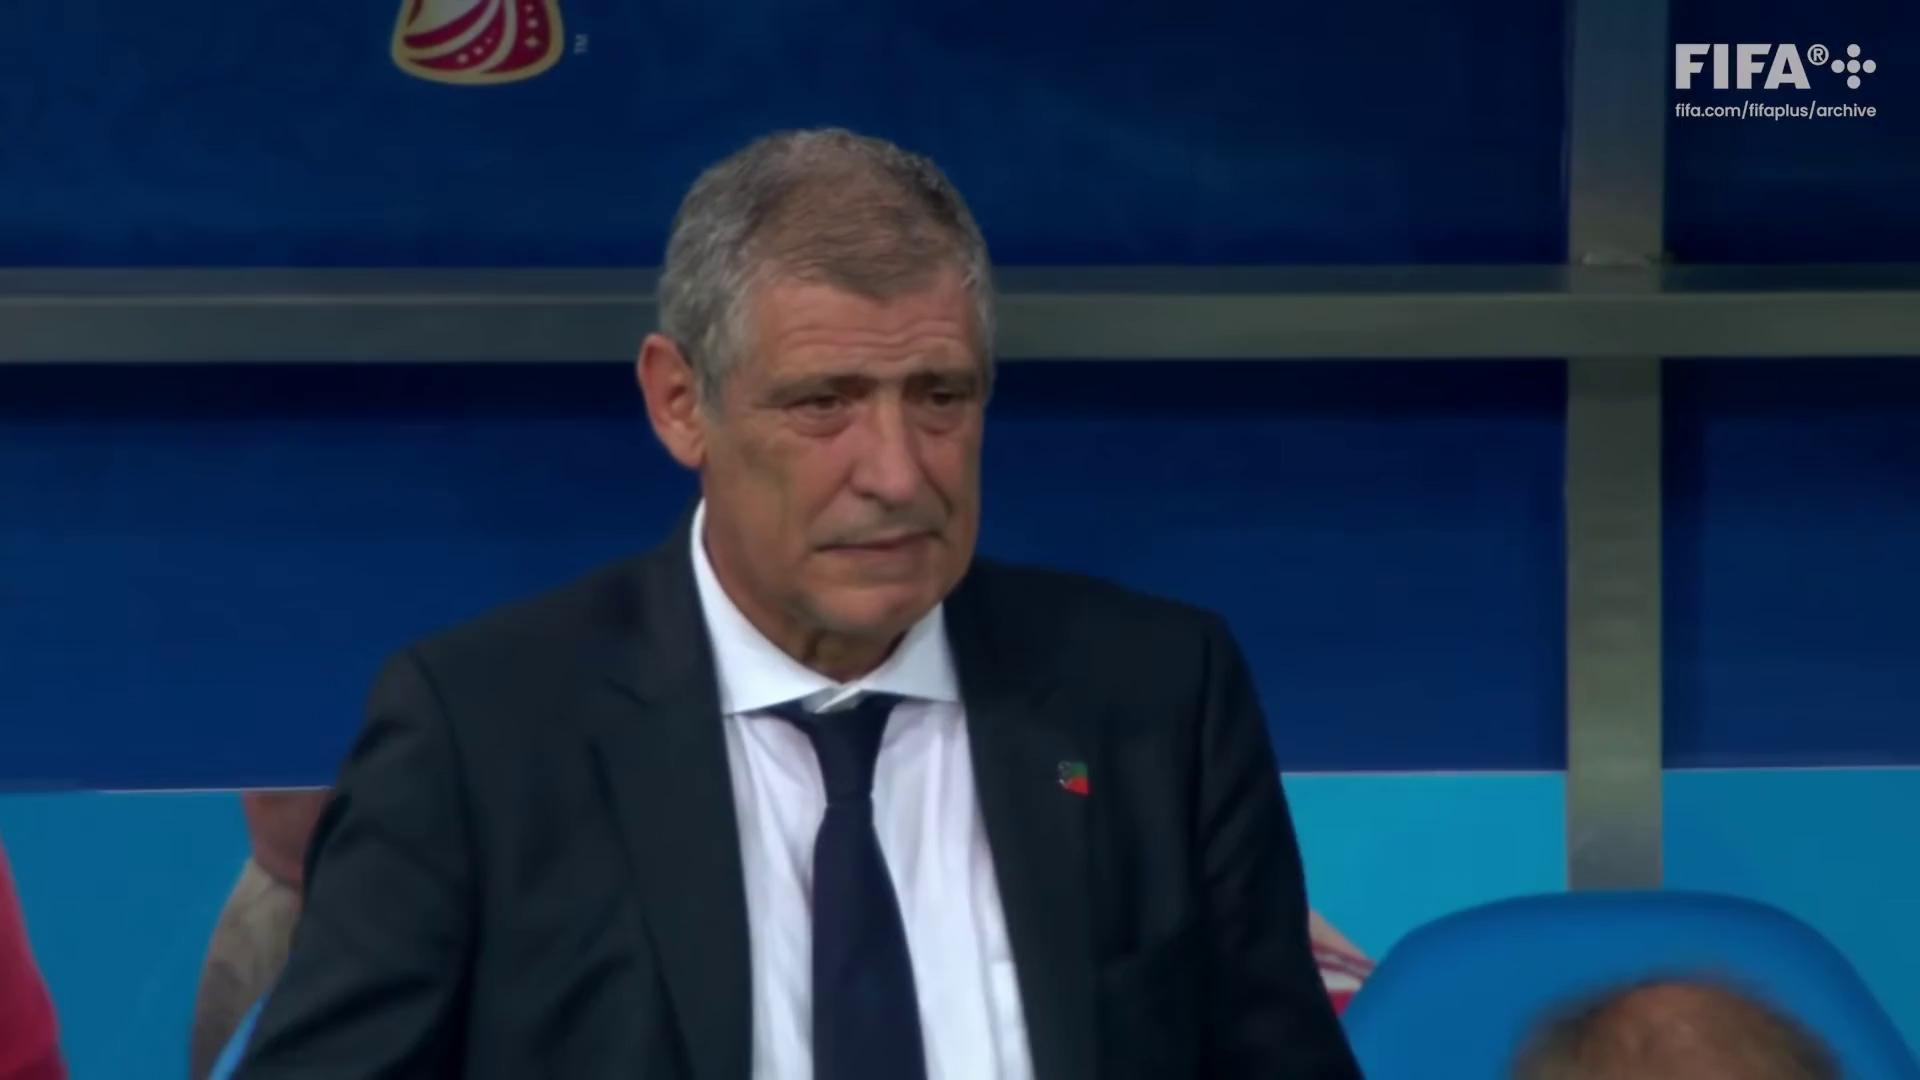
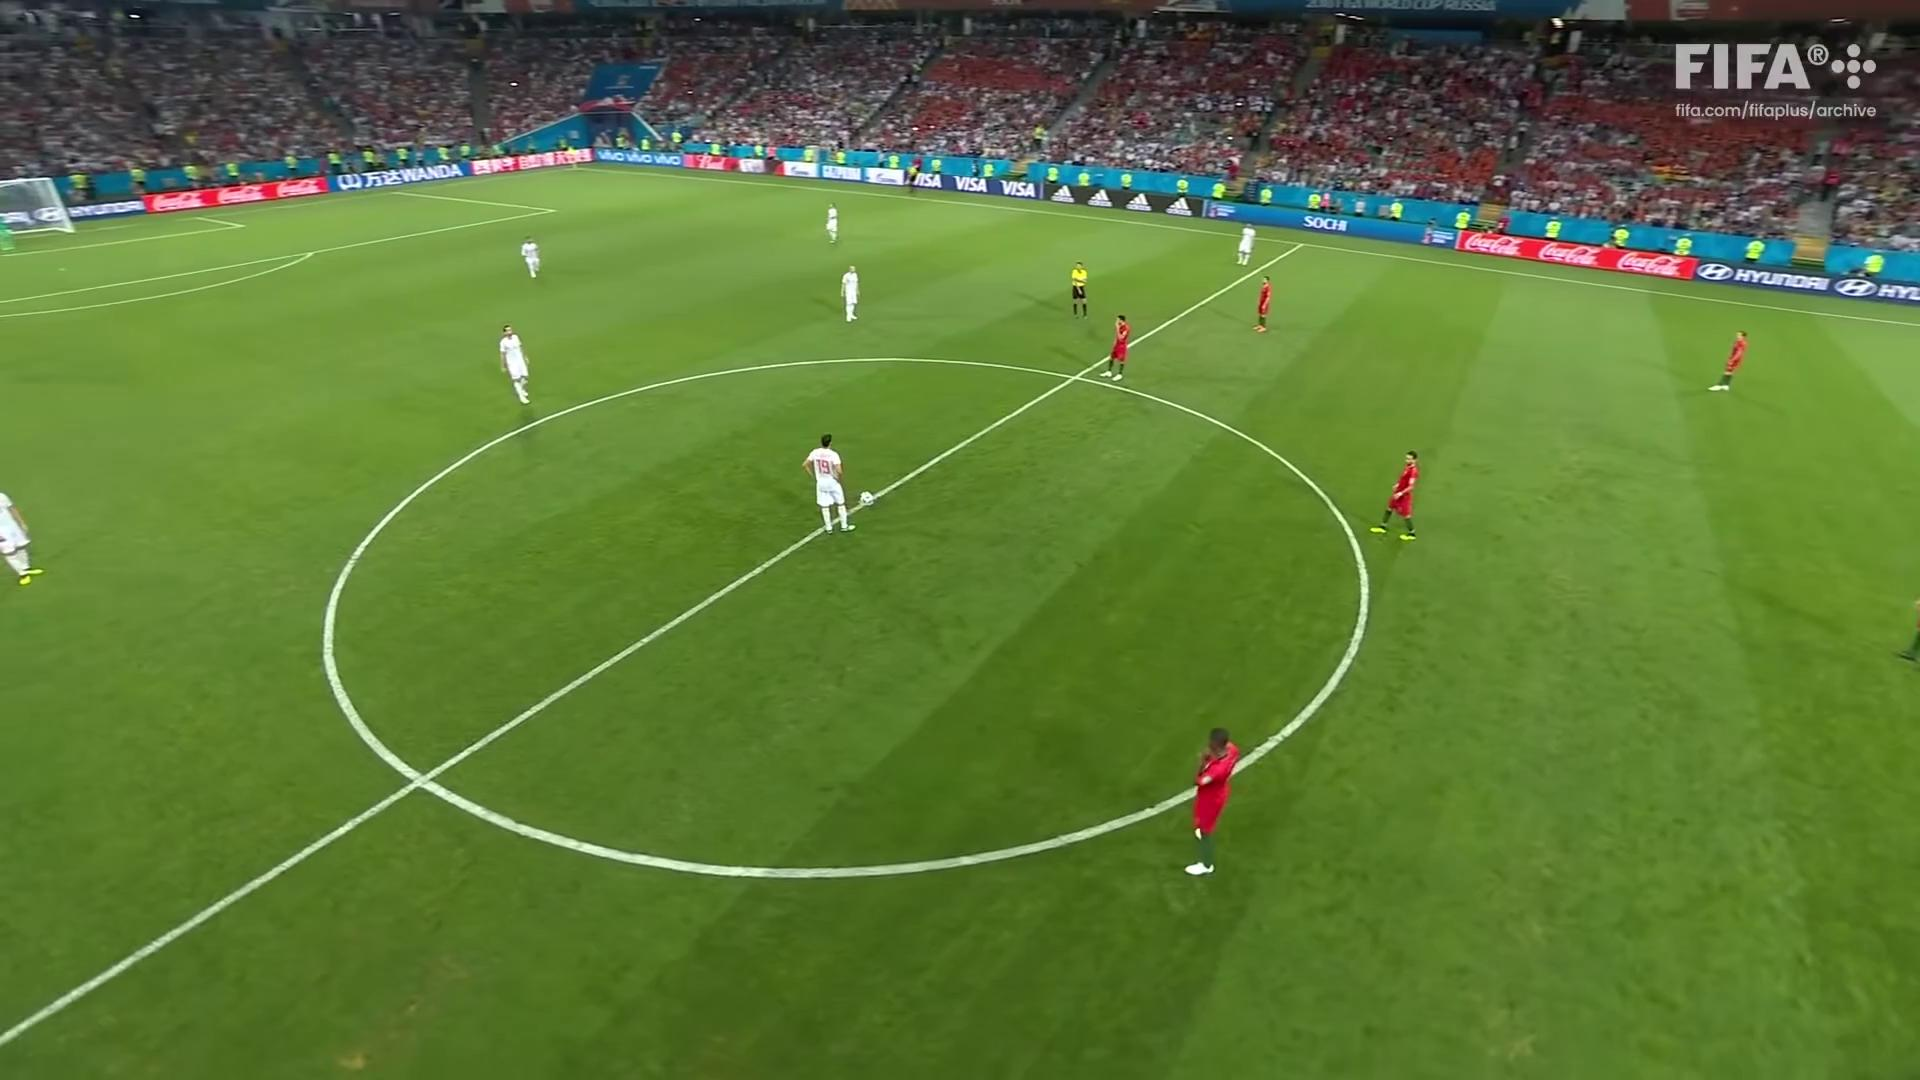
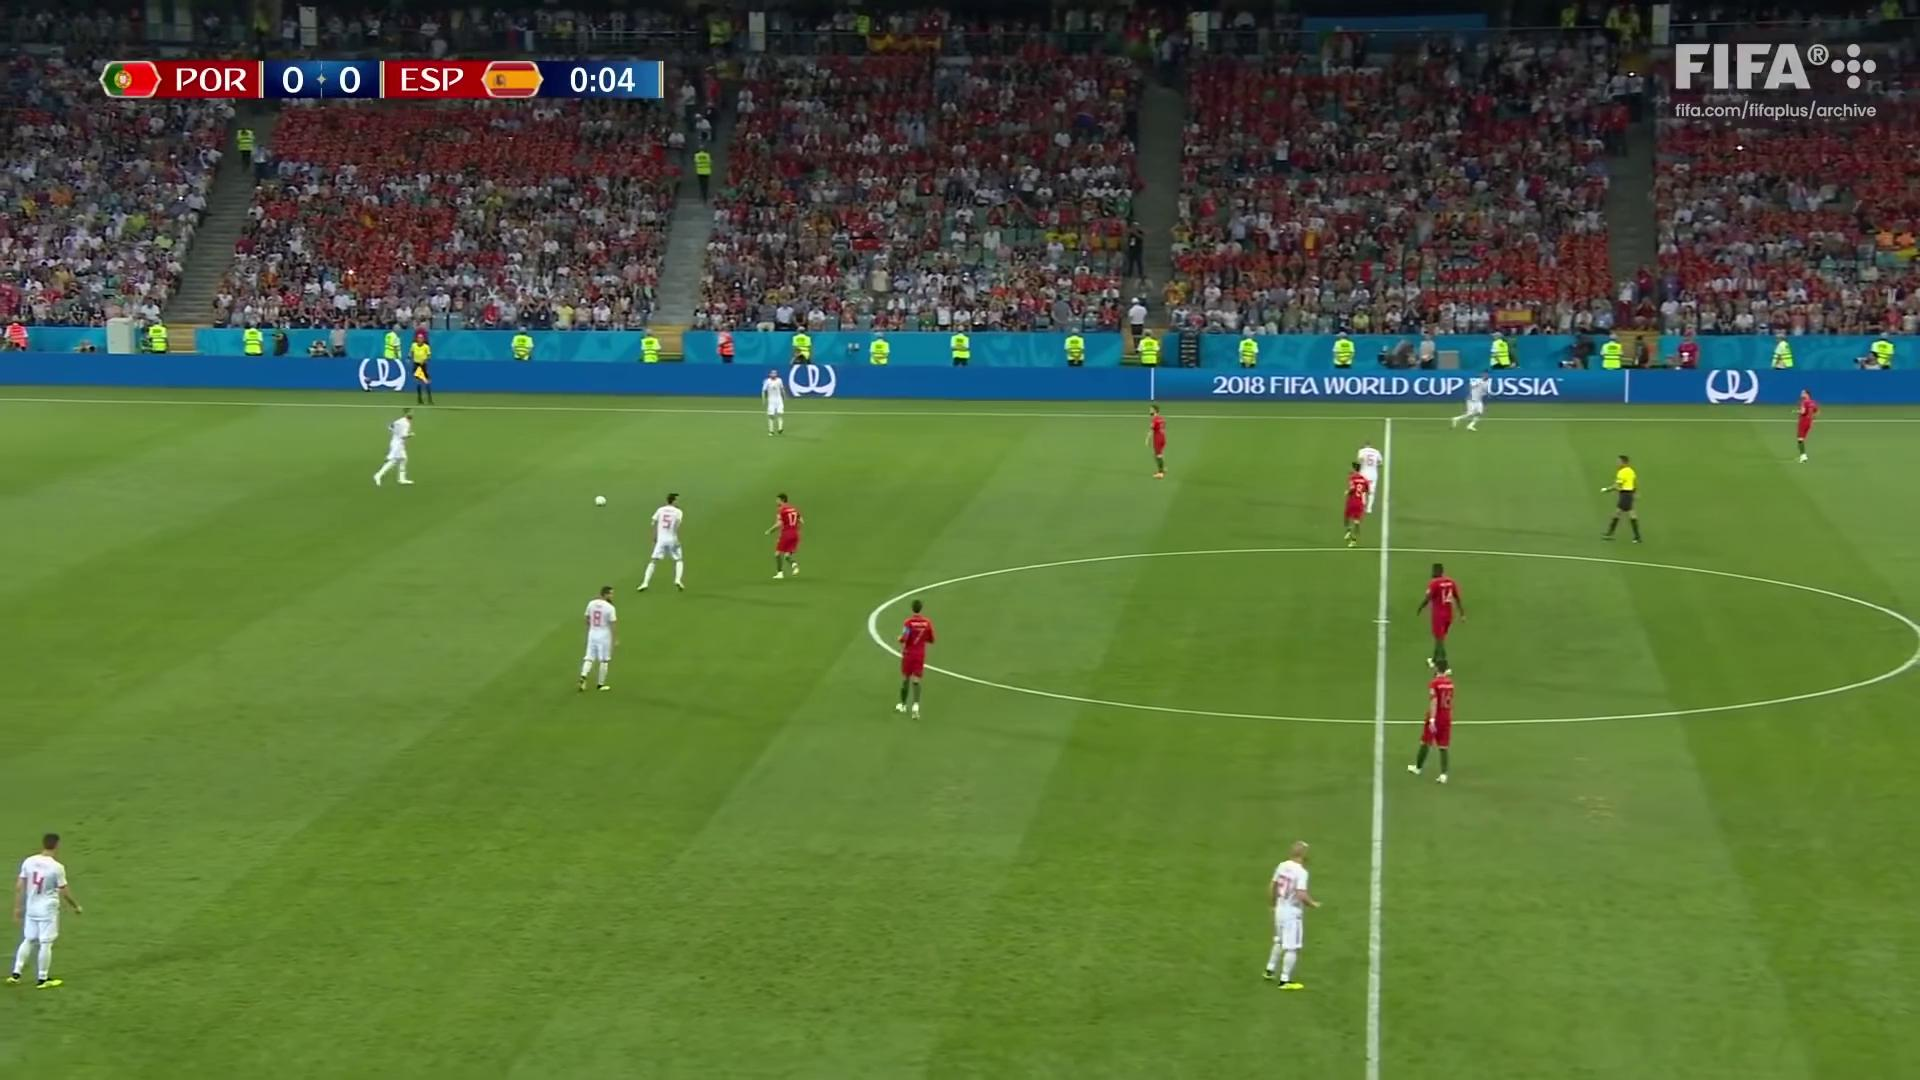

In [36]:
import pixeltable as pxt

table = pxt.get_table("poc.data")
table.show()

In [12]:
text_corpus = table.select(
    table.video_caption,
    table.transcription.text
)

@pxt.udf
def compose_semantics(video_caption: pxt.type_system.String, transcript: pxt.type_system.Json) -> str:
    return f"{video_caption}.{transcript['text']}"

In [7]:
text_corpus.show()

video_caption,transcription_text
"A group of soccer players are huddling together on the field, discussing a moment in the game. The players are standing in a circle, with one player in the center, wearing a red jersey with the number 7, who appears to be the focal point of their discussion. The other players are wearing yellow jerseys, indicating they are part of the opposing team.",at eight days ago. Portugal regularly used a 442 formation in qualifying where the gay dash plays just behind Ronaldo or alongside him we will just have to wait and see. Portugal have played in more World Cups with Cristiano Ronaldo than without. They're forced with their talisman. It's their seventh World Cup in all. Jan-lukaraqui from Italy is in
"The video shows a group of individuals engaged in the action of playing soccer, which involves walking, carrying/holding an object, and watching a person. The players are seated in a control room, surrounded by multiple screens displaying various images and data related to the game, including a live feed of the soccer match and tactical analysis. The screens are arranged in a semi-circle, and the players are wearing yellow shirts, indicating they are part of the same team.","to Italian assistance. Ra'Yuzin Sato from Japan is the fourth official. And back in Moscow, there is the line up of VAR officials, led by Massa Miliano Irati from Italy. David DeHaie was an ever-presenting qualifying. Many of this Spanish team we know."
"The video shows a soccer match between spain and another team, with the players from spain wearing red jerseys with the number 6 on the front, and the opposing team's players wearing white jerseys with the number 1 on the front. The players are standing on a soccer field with a green surface and white boundary lines, and the stadium is filled with spectators.",the first time in the year. The coach is Sergio Puskats is arguably Spain's most important player. The extra time winner when Spain beat the Netherlands in the 2010 World Cup final. Sergio Ramos captains Spain knew coach Fernando Iero was Ramos's hero when he was growing up. Diego Costa leads the attack. Four of this starting 11 started
"The video shows a soccer match where players are shooting the ball. The players are on the field, with one player in a white jersey in possession of the ball and another player in a red jersey attempting to intercept or defend. The field is marked with white lines, and the stands are filled with spectators.","What a great day. Fernando Santos. Portugal qualified for this World Cup on his 63rd birthday last October by beating Switzerland. And I bet he never thought he'd be sitting there. Fernando Iero, the former Spanish International Real Madrid defender, promoted from his post of sporting director"
"A soccer match is underway, with players from two teams, one wearing red kits and the other in white, competing in a high-stakes game. The players are positioned on the field, with some in the center circle and others along the sidelines, as they engage in a competitive match. The players in red are spread across the field, with some closer to the center circle and others near the sidelines, while the players in white are positioned in a similar manner. The referee is visible in the center of the image, overseeing the game.",to just the
"A soccer match is underway between portugal and spain, with the score currently tied at 0-0. The players from both teams are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The players are wearing their respective team colors, with portugal in white and spain in red. The scoreboard at the top of the image displays the teams and the score, while the field is marked with white lines and has a vibrant green color.","as this match gets underway. Spain and Portugal, who have both lost their opening match in the last two World Cups. The stage is set here in Sochi for what could be a World Cup classic to 

In [37]:
table.columns

['video',
 'audio',
 'transcription',
 'metadata',
 'video_caption',
 'text',
 'fulltext']

In [21]:
import pixeltable as pxt
from pixeltable.iterators.string import StringSplitter
from pixeltable.functions import huggingface

embed_model = huggingface.sentence_transformer.using(model_id='all-MiniLM-L6-v2')

table.add_computed_column(
    fulltext=compose_semantics(table.video_caption, table.transcription), if_exists="replace"
)

text_view = pxt.create_view(
    "textdata",
    table,
    iterator=StringSplitter.create(text=table.fulltext, separators='sentence'), if_exists="replace"
)




Added 10 column values with 0 errors.
Inserting rows into `textdata`: 73 rows [00:00, 28264.03 rows/s]
Created view `textdata` with 73 rows, 0 exceptions.


In [38]:
text_view.select(
    text_view.fulltext
).show(10)

fulltext
"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 0-0 scoreline, with the time at 0:36.. the red. Portugal in the all red. Spain tonight in the change colours of white with the red trim won by David Silva. It's away by Jose Fonk. Looking for the run up front of Guede. Ronaldo. Little double step over to start"
"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 0-0 scoreline, with the time at 0:36.. the red. Portugal in the all red. Spain tonight in the change colours of white with the red trim won by David Silva. It's away by Jose Fonk. Looking for the run up front of Guede. Ronaldo. Little double step over to start"
"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 0-0 scoreline, with the time at 0:36.. the red. Portugal in the all red. Spain tonight in the change colours of white with the red trim won by David Silva. It's away by Jose Fonk. Looking for the run up front of Guede. Ronaldo. Little double step over to start"
"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 0-0 scoreline, with the time at 0:36.. the red. Portugal in the all red. Spain tonight in the change colours of white with the red trim won by David Silva. It's away by Jose Fonk. Looking for the run up front of Guede. Ronaldo. Little double step over to start"
"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 0-0 scoreline, with the time at 0:36.. the red. Portugal in the all red. Spain tonight in the change colours of white with the red trim won by David Silva. It's away by Jose Fonk. Looking for the run up front of Guede. Ronaldo. Little double step over to start"
"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 0-0 scoreline, with the time at 0:36.. the red. Portugal in the all red. Spain tonight in the change colours of white with the red trim won by David Silva. It's away by Jose Fonk. Looking for the run up front of Guede. Ronaldo. Little double step over to start"
"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 0-0 scoreline, with the time at 0:36.. the red. Portugal in the all red. Spain tonight in the change colours of white with the red trim won by David Silva. It's away by Jose Fonk. Looking for the run up front of Guede. Ronaldo. Little double step over to start"
"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball

Table
'poc.data'

    Column Name    Type                                      Computed With
          video   Video                                                   
          audio   Audio                 extract_audio(video, format='mp3')
  transcription    Json           transcribe(audio=audio, model='base.en')
       metadata    Json                                get_metadata(audio)
  video_caption  String  core.functions.caption_video(video=video, prom...
           text  String    compose_semantics(video_caption, transcription)
       fulltext  String    compose_semantics(video_caption, transcription)


video,fulltext
,"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 0-0 scoreline, with the time at 0:36.. the red. Portugal in the all red. Spain tonight in the change colours of white with the red trim won by David Silva. It's away by Jose Fonk. Looking for the run up front of Guede. Ronaldo. Little double step over to start"
,"A soccer match is underway, with the main action being a player attempting to shoot the ball into the goal. The player in a red jersey is in possession of the ball and is dribbling towards the goal, with a player in a white jersey in close proximity, possibly attempting to defend or intercept. The goalkeeper, also in a green jersey, is positioned in front of the goal, ready to react to the play.. before we can take a look at"
,"A soccer match is underway, with players from portugal and spain competing in a high-intensity game. The players are actively engaged in the game, with some in possession of the ball and others in defensive or offensive positions. The scoreboard indicates that the match is in the 1st minute, with the score at 0-0.. from the 2016 European champions. They've won 79% of their competitive matches under Fernando Santos, just two defeats in 29. That's for Spain, the start of a new era under Fernando Iero. They were unbeaten under Gillian Lopategi."

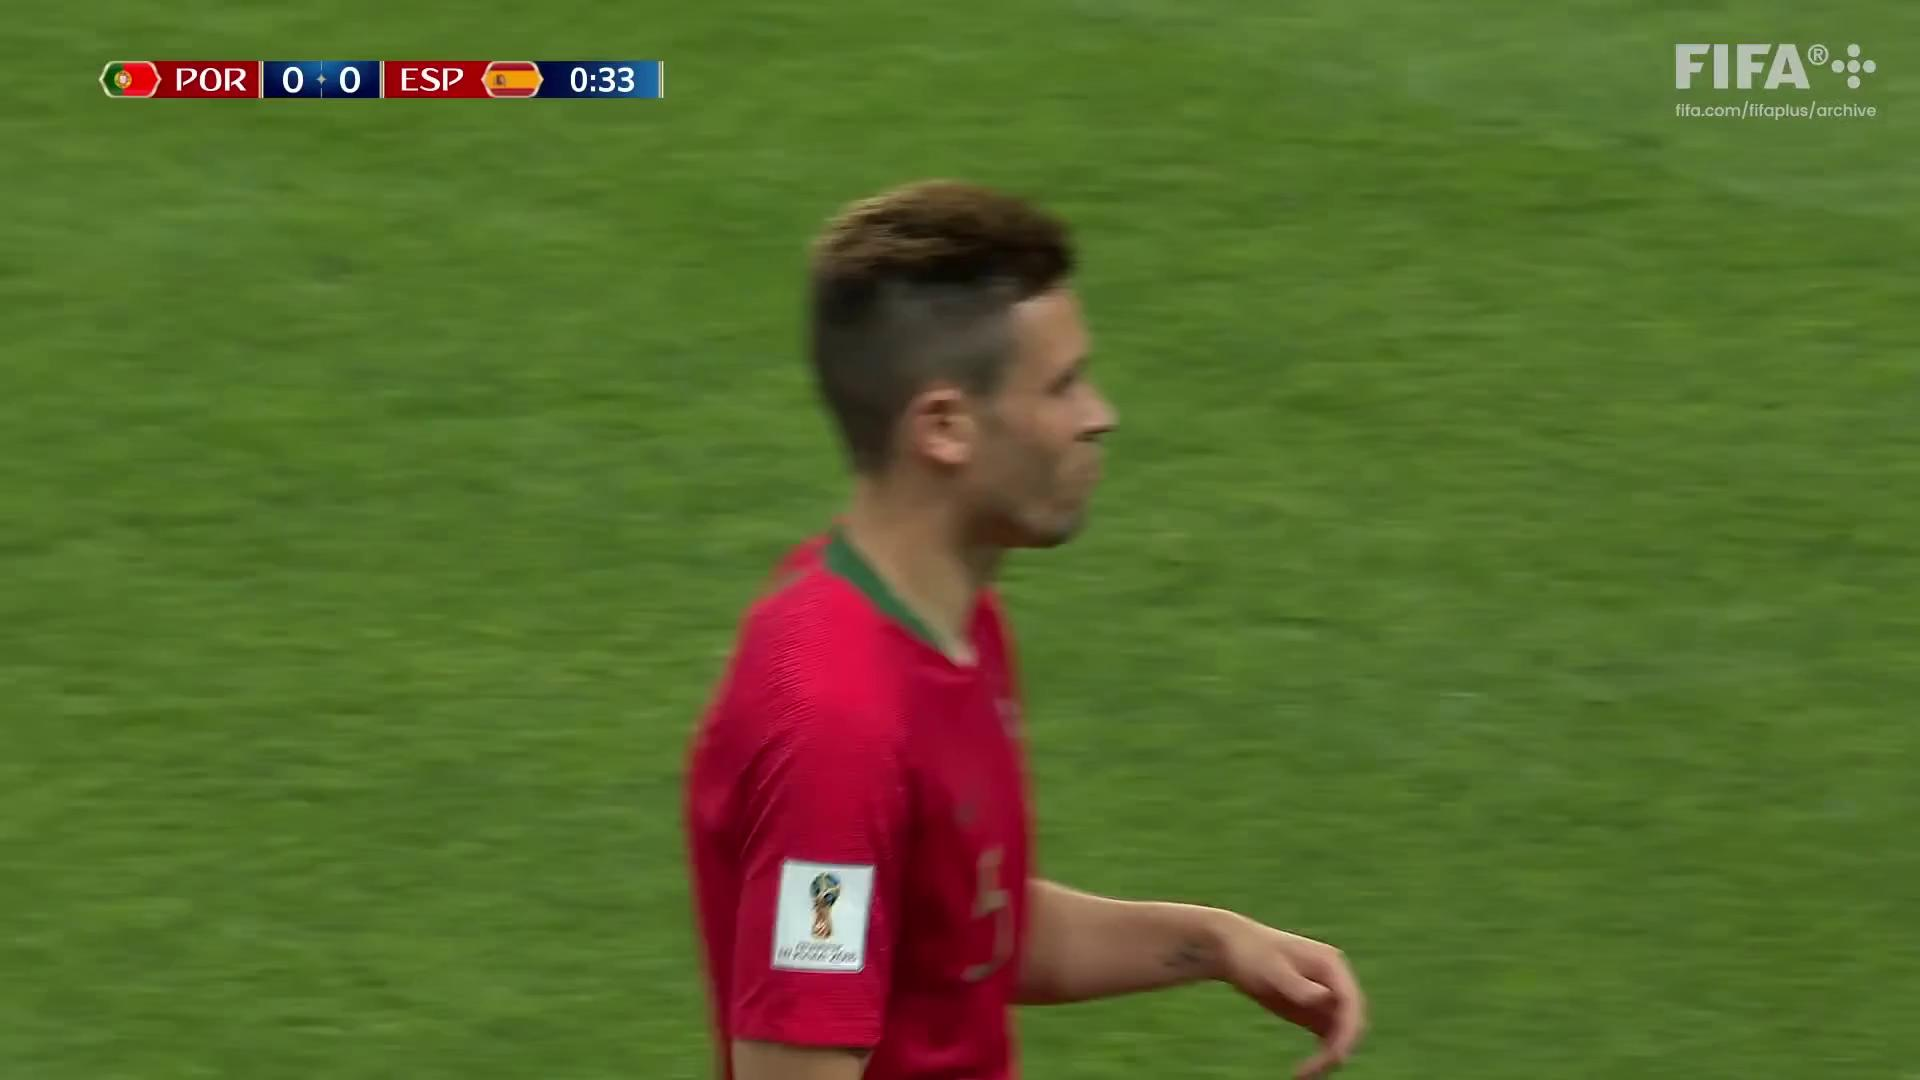
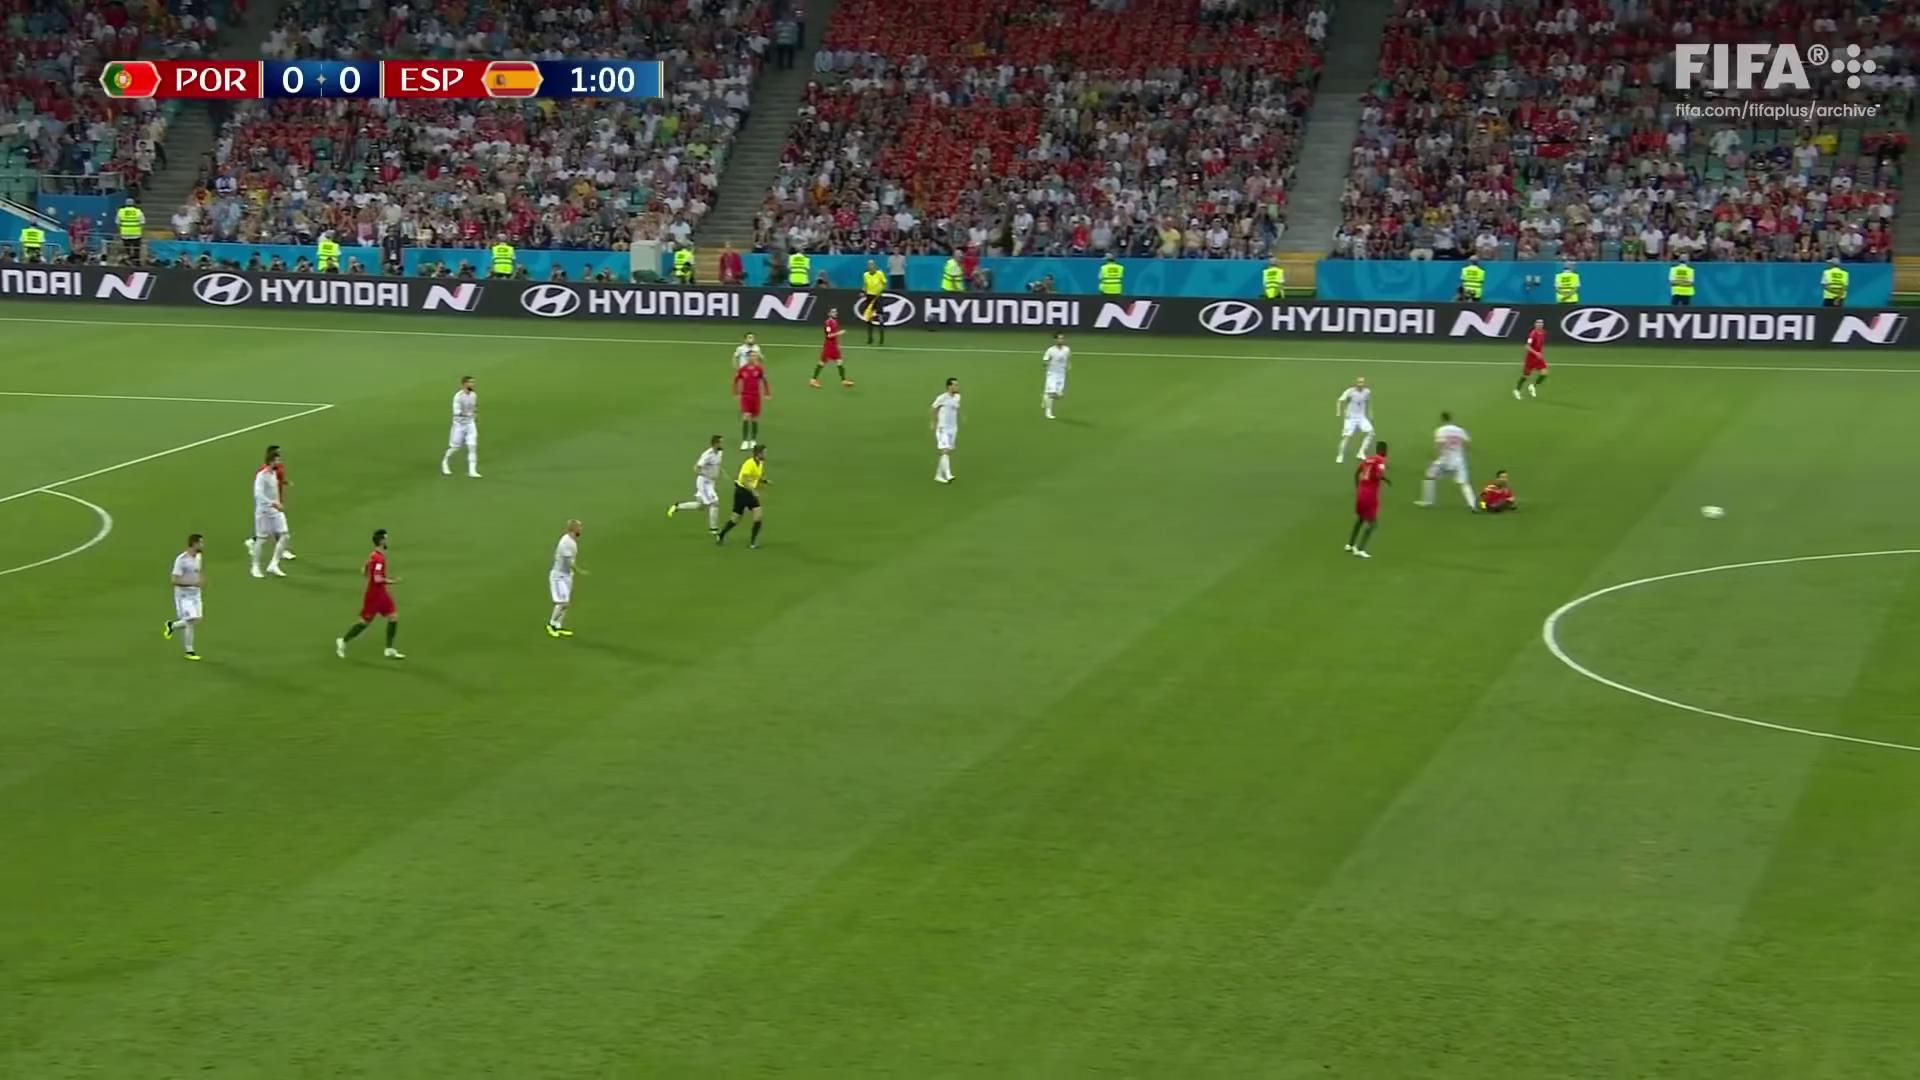
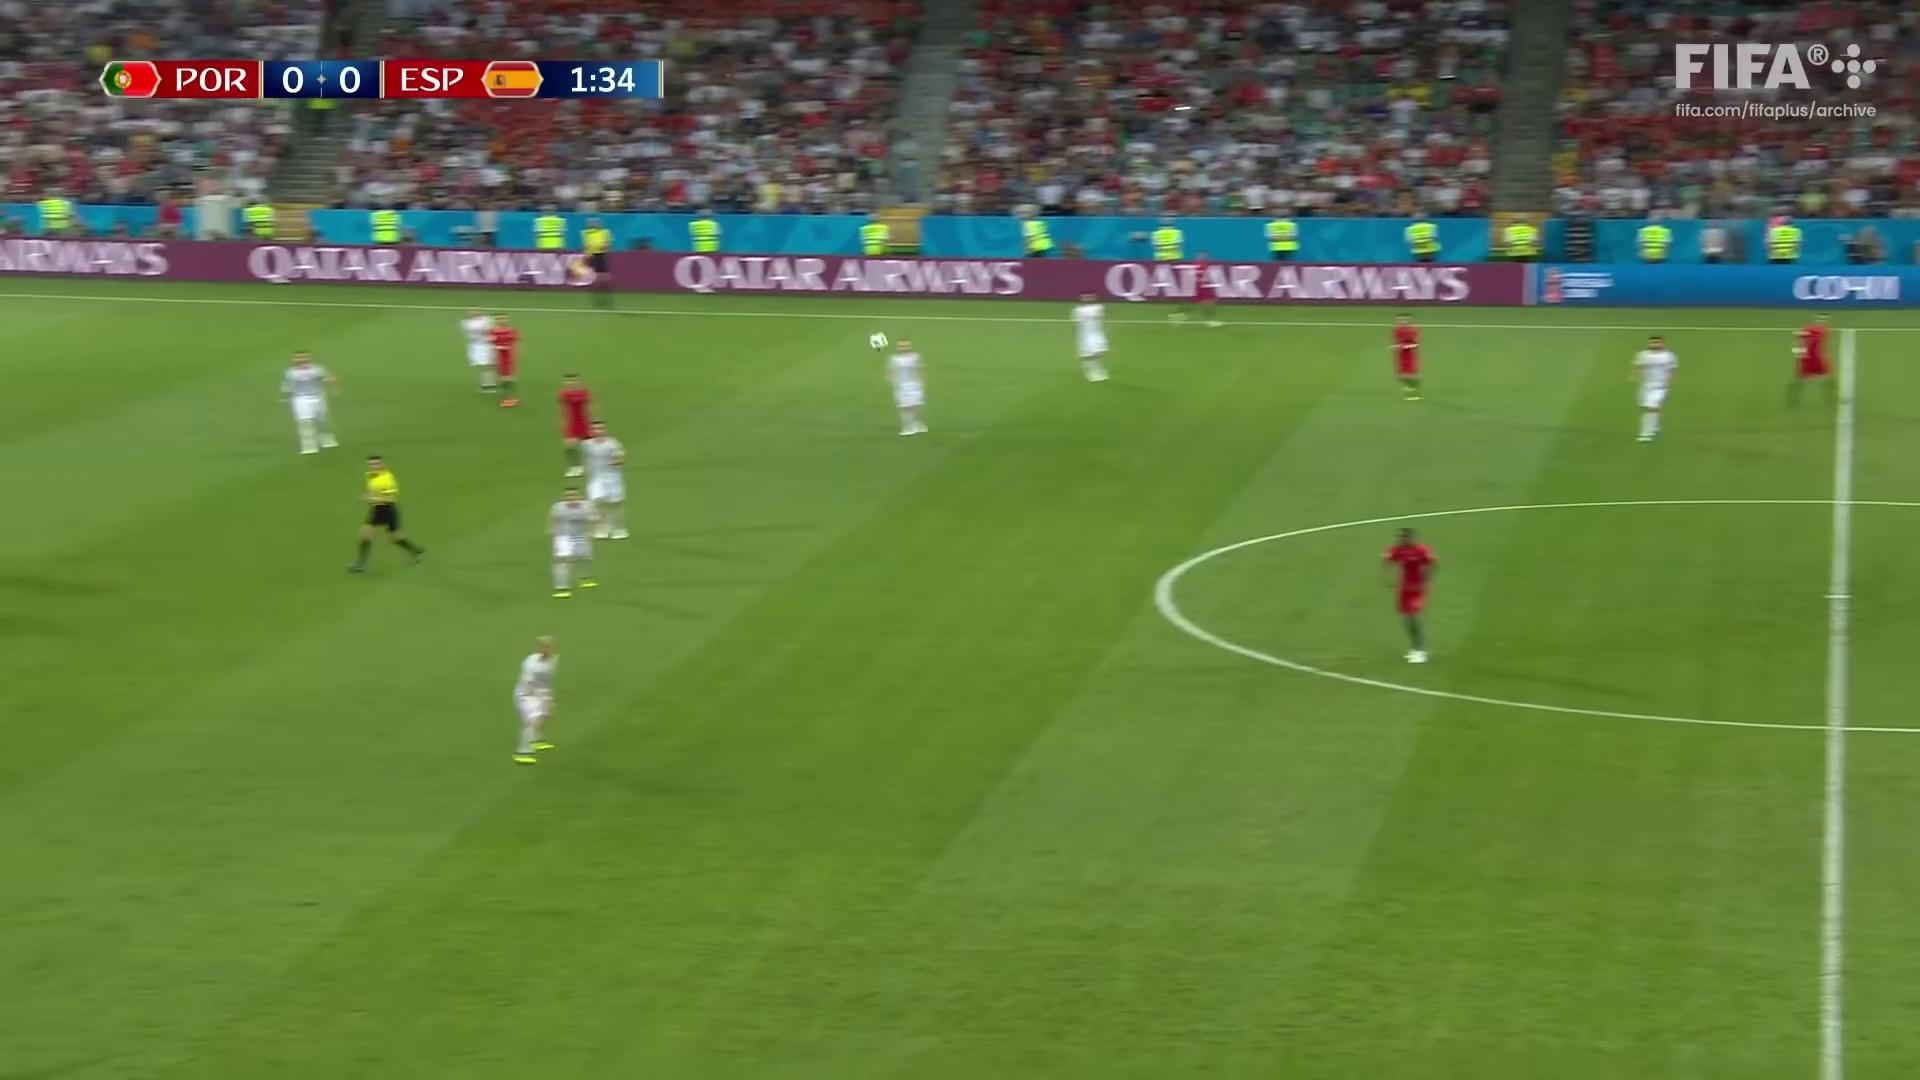

In [44]:
print(table)
table.select(
    table.video,
    table.fulltext
).show(3)

In [48]:
texts = table.select(
    table.fulltext
).collect().to_pandas()

In [54]:
texts.to_csv("texts_csv.csv")

In [58]:
from pixeltable.functions.huggingface import sentence_transformer

embd_func = sentence_transformer.using(model_id='sentence-transformers/all-MiniLM-L12-v2')
view = pxt.create_view(
    "sentences",
    table,
    iterator=StringSplitter.create(text=table.fulltext, separators='sentence'),
    if_exists='replace'
)

view.columns


Inserting rows into `sentences`: 73 rows [00:00, 28674.30 rows/s]
Created view `sentences` with 73 rows, 0 exceptions.


['pos',
 'text',
 'video',
 'audio',
 'transcription',
 'metadata',
 'video_caption',
 'fulltext']

In [59]:

view.add_embedding_index(
    view.text,
    embedding=embd_func
)


Error: The function `None` is not a valid embedding: it must return a 1-dimensional array of a specific length, but returns Array[(None,), Float]

In [ ]:
@pxt.query
def get_relevant_context(query_text: str, limit: int = 3):
    sim = text_view.text.similarity(query_text)
    # Return a list of strings (text of relevant chunks)
    return text_view.order_by(sim, asc=False).limit(limit).select(text_view.text)